In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow import keras

# Diretórios de dados
base_dir = 'Imagens/'
train_dir = os.path.join(base_dir, 'train/train5/')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [2]:
# Configuração do ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

IMG_SIZE = 32
BATCH_SIZE = 64
num_classes = 10

train_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)

validation_dataset = datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)

test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)



Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [9]:
#Criar o modelo

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
    ])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 64)       

In [4]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

In [5]:
# Treinar o modelo
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


625/625 [==============================] - 109s 172ms/step - loss: 2.9569 - accuracy: 0.3486 - val_loss: 2.6363 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 20s 32ms/step - loss: 2.1964 - accuracy: 0.4882 - val_loss: 2.1044 - val_accuracy: 0.4896 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 22s 35ms/step - loss: 1.8446 - accuracy: 0.5548 - val_loss: 2.1623 - val_accuracy: 0.4530 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 22s 35ms/step - loss: 1.6625 - accuracy: 0.5969 - val_loss: 1.6606 - val_accuracy: 0.5752 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 22s 35ms/step - loss: 1.5643 - accuracy: 0.6212 - val_loss: 1.5370 - val_accuracy: 0.6385 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 22s 35ms/step - loss: 1.5435 - accuracy: 0.6357 - val_loss: 1.5406 - val_accuracy: 0.6462 - lr: 0.0010
Epoch 7/100
625/625 [===========================

In [6]:
#Saving the model
model.save('Primeiro_treino_AllTrains.h5')

c:\Users\Tex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
model = keras.models.load_model('Primeiro_treino_AllTrains.h5')
# Validacao da Rede
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')

157/157 [==============================] - 2s 13ms/step - loss: 0.6524 - accuracy: 0.8411
val_acc: 0.8410999774932861
157/157 [==============================] - 5s 30ms/step - loss: 0.6805 - accuracy: 0.8325
Test accuracy: 0.8324999809265137


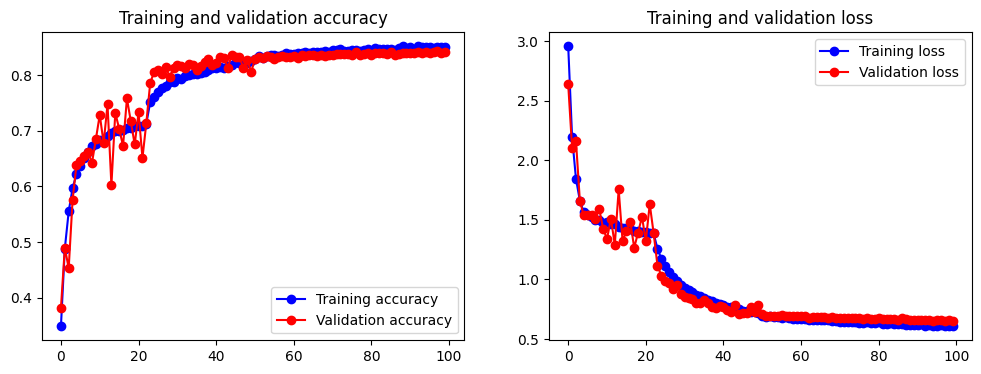

In [8]:
# Plotando os resultados
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)